# Year 2023 Day 23

[--- Day 23: A Long Walk ---](https://adventofcode.com/2023/day/23)


In [1]:
from advent_of_code.common.common import get_puzzle_input_file_path
from advent_of_code.y_2023.problem_202323 import AdventOfCodeProblem202323
from advent_of_code.y_2023.problem_202323 import (
    bruteforce_paths_in_exploration_tree,
    create_flatset,
)
from advent_of_code.common.store import ExampleInputsStore

from advent_of_code.common.graph_visualization import construct_dot_graph_from_dict
from advent_of_code.y_2023.problem_202323 import create_flat_simplified

## Test data


### Part 1


In [2]:
EXAMPLE_INPUT = ExampleInputsStore.from_private_resources_repository(2023).retrieve(
    "test_problem_202323"
)

In [3]:
text = EXAMPLE_INPUT
parsed = AdventOfCodeProblem202323.parse_text_input(text)

In [4]:
from advent_of_code.y_2023.problem_202323 import (
    compute_exploration_tree,
    flatten_exploration_tree,
)


hiking_trail = hk = parsed
starting_position = (1, 2)

tree = compute_exploration_tree(hk, starting_position)
flat = flatten_exploration_tree(tree)

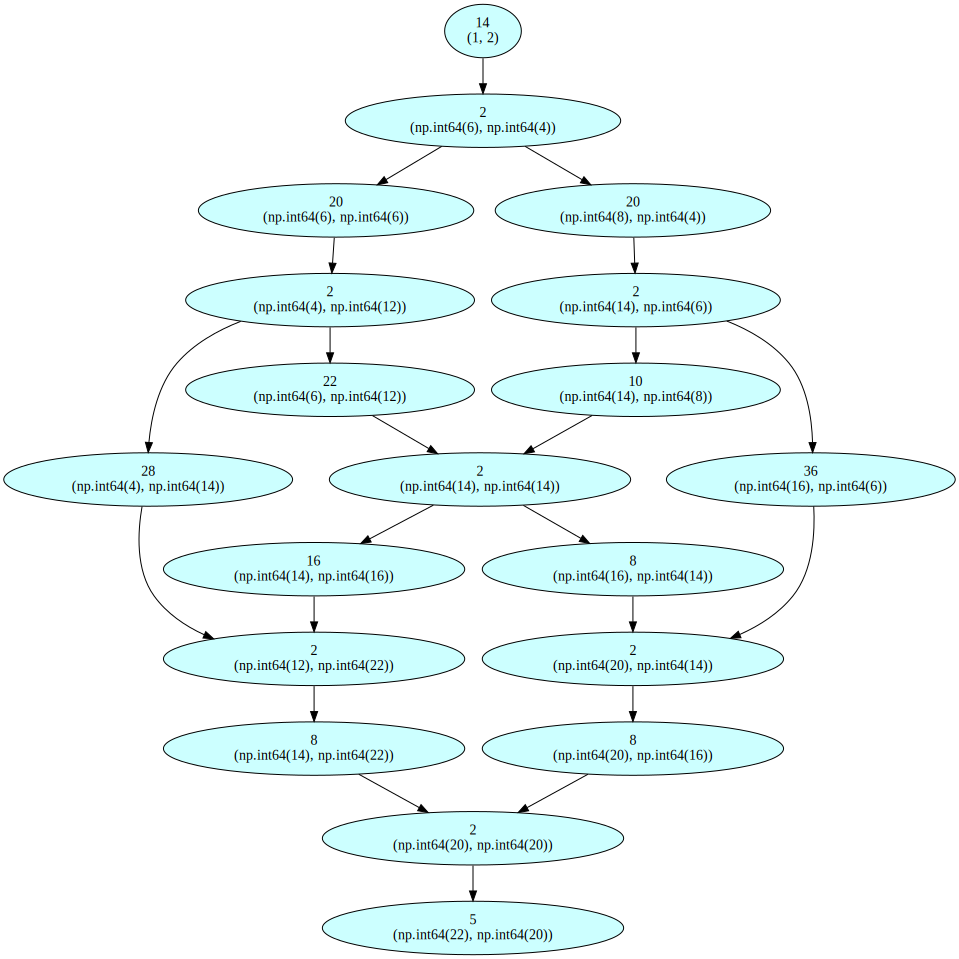

In [5]:
flat_simplified = create_flat_simplified(flat)
dot = construct_dot_graph_from_dict(flat_simplified)
dot

In [6]:
bf = bruteforce_paths_in_exploration_tree(tree, 0)

In [7]:
bf

[[83, [95, 87]], [[83, 75], 91]]

In [8]:
import re

# It works ^^
flattened = [int(c) for c in re.findall(r"\d+", str(bf))]
flattened

[83, 95, 87, 83, 75, 91]

In [9]:
import numpy as np

np.array(list(reversed(sorted(flattened)))) - 1

array([94, 90, 86, 82, 82, 74])

### Part 2

Assumption: In Part 1, we already explored all paths. The explored graph
should be reusable and transformed into an undirected graph. No need to backtrack.
Note: if bugs arise, verify more formally this assumption.


In [10]:
from advent_of_code.y_2023.problem_202323 import (
    create_flat_simplified_tuple,
    make_undirected_graph,
)


flat = create_flat_simplified_tuple(flat)
couples = make_undirected_graph(flat, bidirectional=True)
couples_for_visu = make_undirected_graph(flat, bidirectional=False)
couples_mapping = {t[0]: t[1] for t in couples}
couples_mapping

{(14, (1, 2)): (2, (np.int64(6), np.int64(4))),
 (2, (np.int64(6), np.int64(4))): (14, (1, 2)),
 (20, (np.int64(6), np.int64(6))): (2, (np.int64(6), np.int64(4))),
 (20, (np.int64(8), np.int64(4))): (2, (np.int64(6), np.int64(4))),
 (2, (np.int64(4), np.int64(12))): (20, (np.int64(6), np.int64(6))),
 (2, (np.int64(14), np.int64(6))): (20, (np.int64(8), np.int64(4))),
 (28, (np.int64(4), np.int64(14))): (2, (np.int64(4), np.int64(12))),
 (22, (np.int64(6), np.int64(12))): (2, (np.int64(4), np.int64(12))),
 (10, (np.int64(14), np.int64(8))): (2, (np.int64(14), np.int64(6))),
 (36, (np.int64(16), np.int64(6))): (2, (np.int64(14), np.int64(6))),
 (2, (np.int64(12), np.int64(22))): (16, (np.int64(14), np.int64(16))),
 (2, (np.int64(14), np.int64(14))): (10, (np.int64(14), np.int64(8))),
 (2, (np.int64(20), np.int64(14))): (8, (np.int64(16), np.int64(14))),
 (8, (np.int64(14), np.int64(22))): (2, (np.int64(12), np.int64(22))),
 (16, (np.int64(14), np.int64(16))): (2, (np.int64(14), np.int64(

In [11]:
flat

{(14, (1, 2)): [(2, (np.int64(6), np.int64(4)))],
 (2, (np.int64(6), np.int64(4))): [(20, (np.int64(6), np.int64(6))),
  (20, (np.int64(8), np.int64(4)))],
 (20, (np.int64(6), np.int64(6))): [(2, (np.int64(4), np.int64(12)))],
 (20, (np.int64(8), np.int64(4))): [(2, (np.int64(14), np.int64(6)))],
 (2, (np.int64(4), np.int64(12))): [(28, (np.int64(4), np.int64(14))),
  (22, (np.int64(6), np.int64(12)))],
 (2, (np.int64(14), np.int64(6))): [(10, (np.int64(14), np.int64(8))),
  (36, (np.int64(16), np.int64(6)))],
 (28, (np.int64(4), np.int64(14))): [(2, (np.int64(12), np.int64(22)))],
 (22, (np.int64(6), np.int64(12))): [(2, (np.int64(14), np.int64(14)))],
 (10, (np.int64(14), np.int64(8))): [(2, (np.int64(14), np.int64(14)))],
 (36, (np.int64(16), np.int64(6))): [(2, (np.int64(20), np.int64(14)))],
 (2, (np.int64(12), np.int64(22))): [(8, (np.int64(14), np.int64(22)))],
 (2, (np.int64(14), np.int64(14))): [(16, (np.int64(14), np.int64(16))),
  (8, (np.int64(16), np.int64(14)))],
 (2, (np

In [12]:
create_flatset(flat)

{(14, (1, 2)): {(2, (np.int64(6), np.int64(4)))},
 (2, (np.int64(6), np.int64(4))): {(14, (1, 2)),
  (20, (np.int64(6), np.int64(6))),
  (20, (np.int64(8), np.int64(4)))},
 (20, (np.int64(6), np.int64(6))): {(2, (np.int64(4), np.int64(12))),
  (2, (np.int64(6), np.int64(4)))},
 (20, (np.int64(8), np.int64(4))): {(2, (np.int64(6), np.int64(4))),
  (2, (np.int64(14), np.int64(6)))},
 (2, (np.int64(4), np.int64(12))): {(20, (np.int64(6), np.int64(6))),
  (22, (np.int64(6), np.int64(12))),
  (28, (np.int64(4), np.int64(14)))},
 (2, (np.int64(14), np.int64(6))): {(10, (np.int64(14), np.int64(8))),
  (20, (np.int64(8), np.int64(4))),
  (36, (np.int64(16), np.int64(6)))},
 (28, (np.int64(4), np.int64(14))): {(2, (np.int64(4), np.int64(12))),
  (2, (np.int64(12), np.int64(22)))},
 (22, (np.int64(6), np.int64(12))): {(2, (np.int64(4), np.int64(12))),
  (2, (np.int64(14), np.int64(14)))},
 (10, (np.int64(14), np.int64(8))): {(2, (np.int64(14), np.int64(6))),
  (2, (np.int64(14), np.int64(14)))},

In [13]:
len(flat)

19

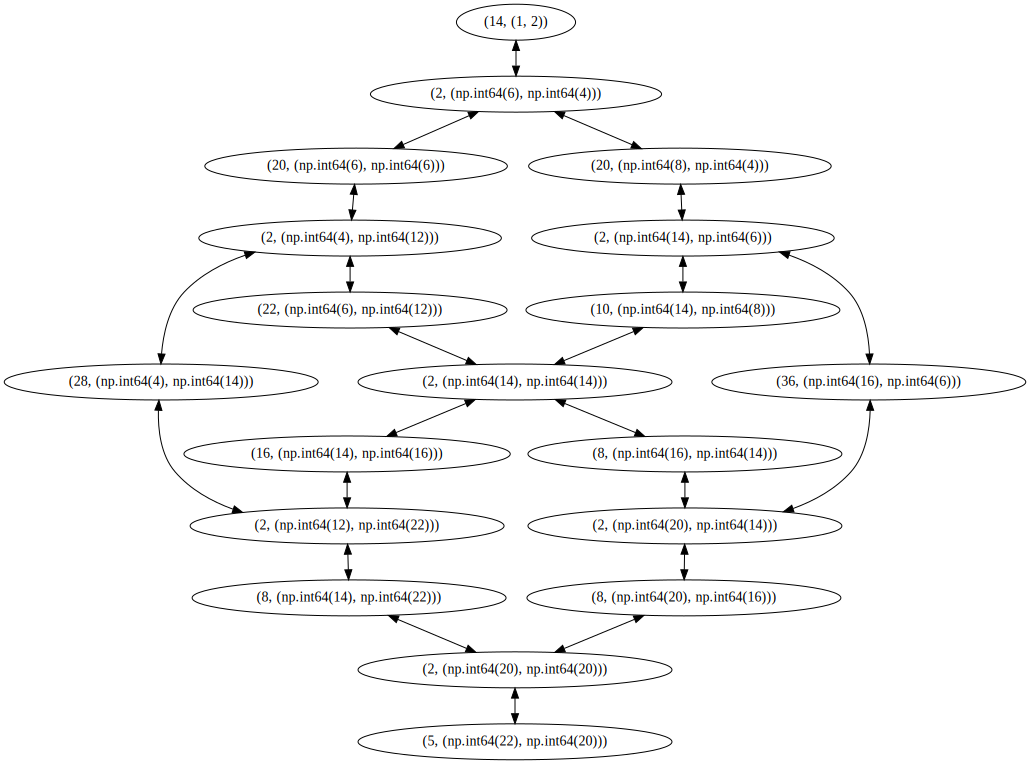

In [14]:
from advent_of_code.common.graph_visualization import construct_dot_graph_from_couples


visu = construct_dot_graph_from_couples(couples_for_visu)
visu

## Actual data


### Part 1


In [15]:
text = (get_puzzle_input_file_path(2023, 23)).read_text()
parsed = AdventOfCodeProblem202323.parse_text_input(text)

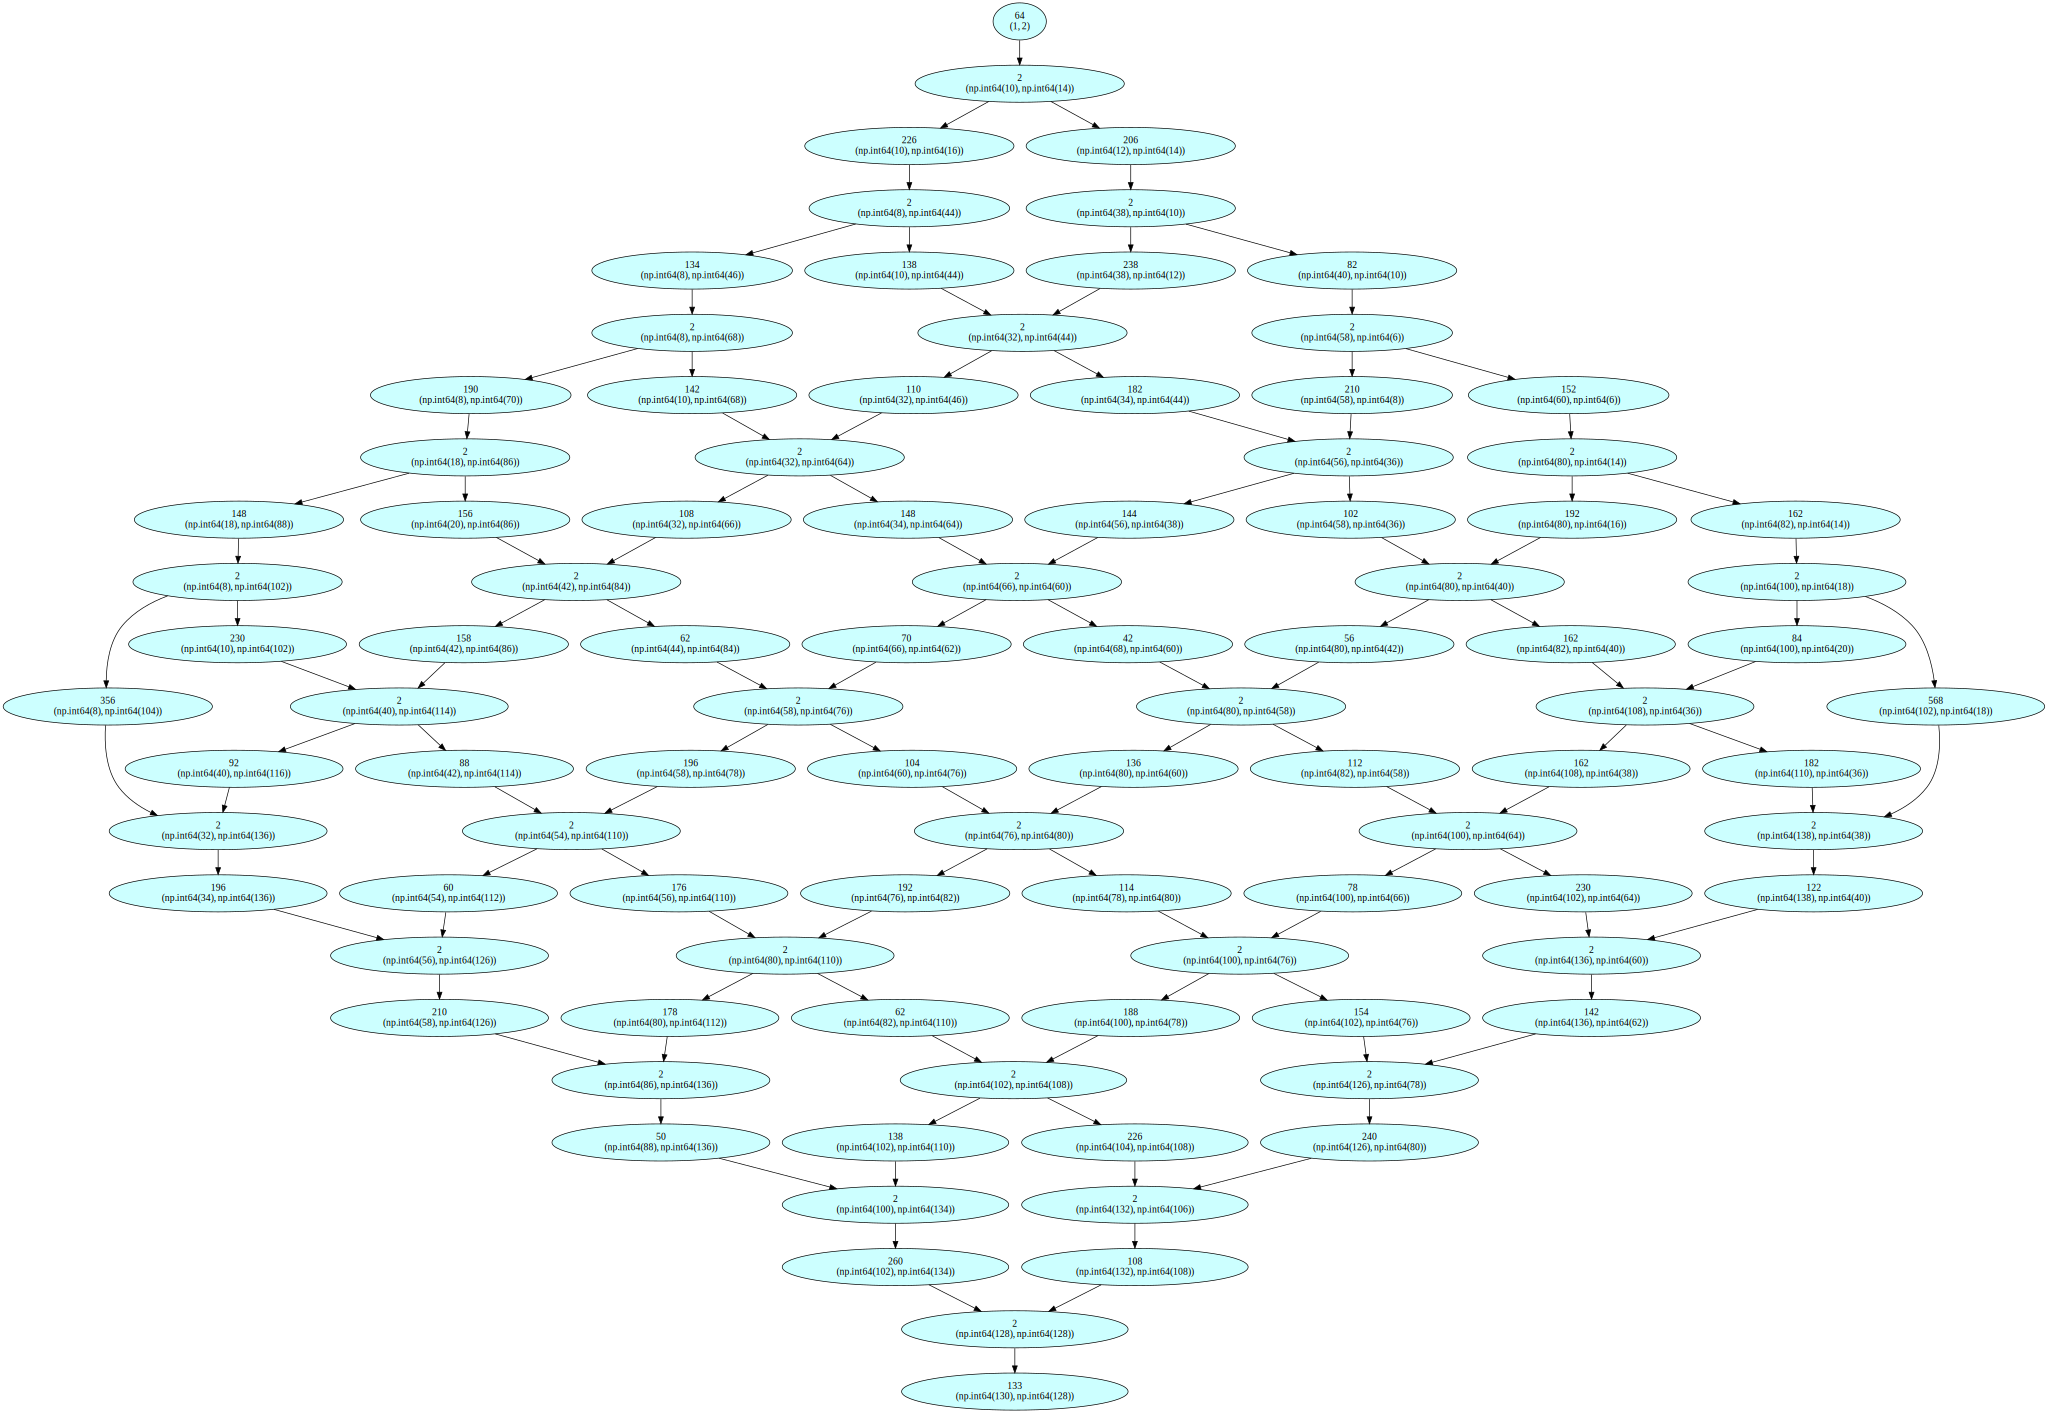

In [16]:
hiking_trail = hk = parsed
starting_position = (1, 2)

tree = compute_exploration_tree(hk, starting_position)
flat = flatten_exploration_tree(tree)
flat_simplified = create_flat_simplified(flat)
dot = construct_dot_graph_from_dict(flat_simplified)
dot

### Part 2


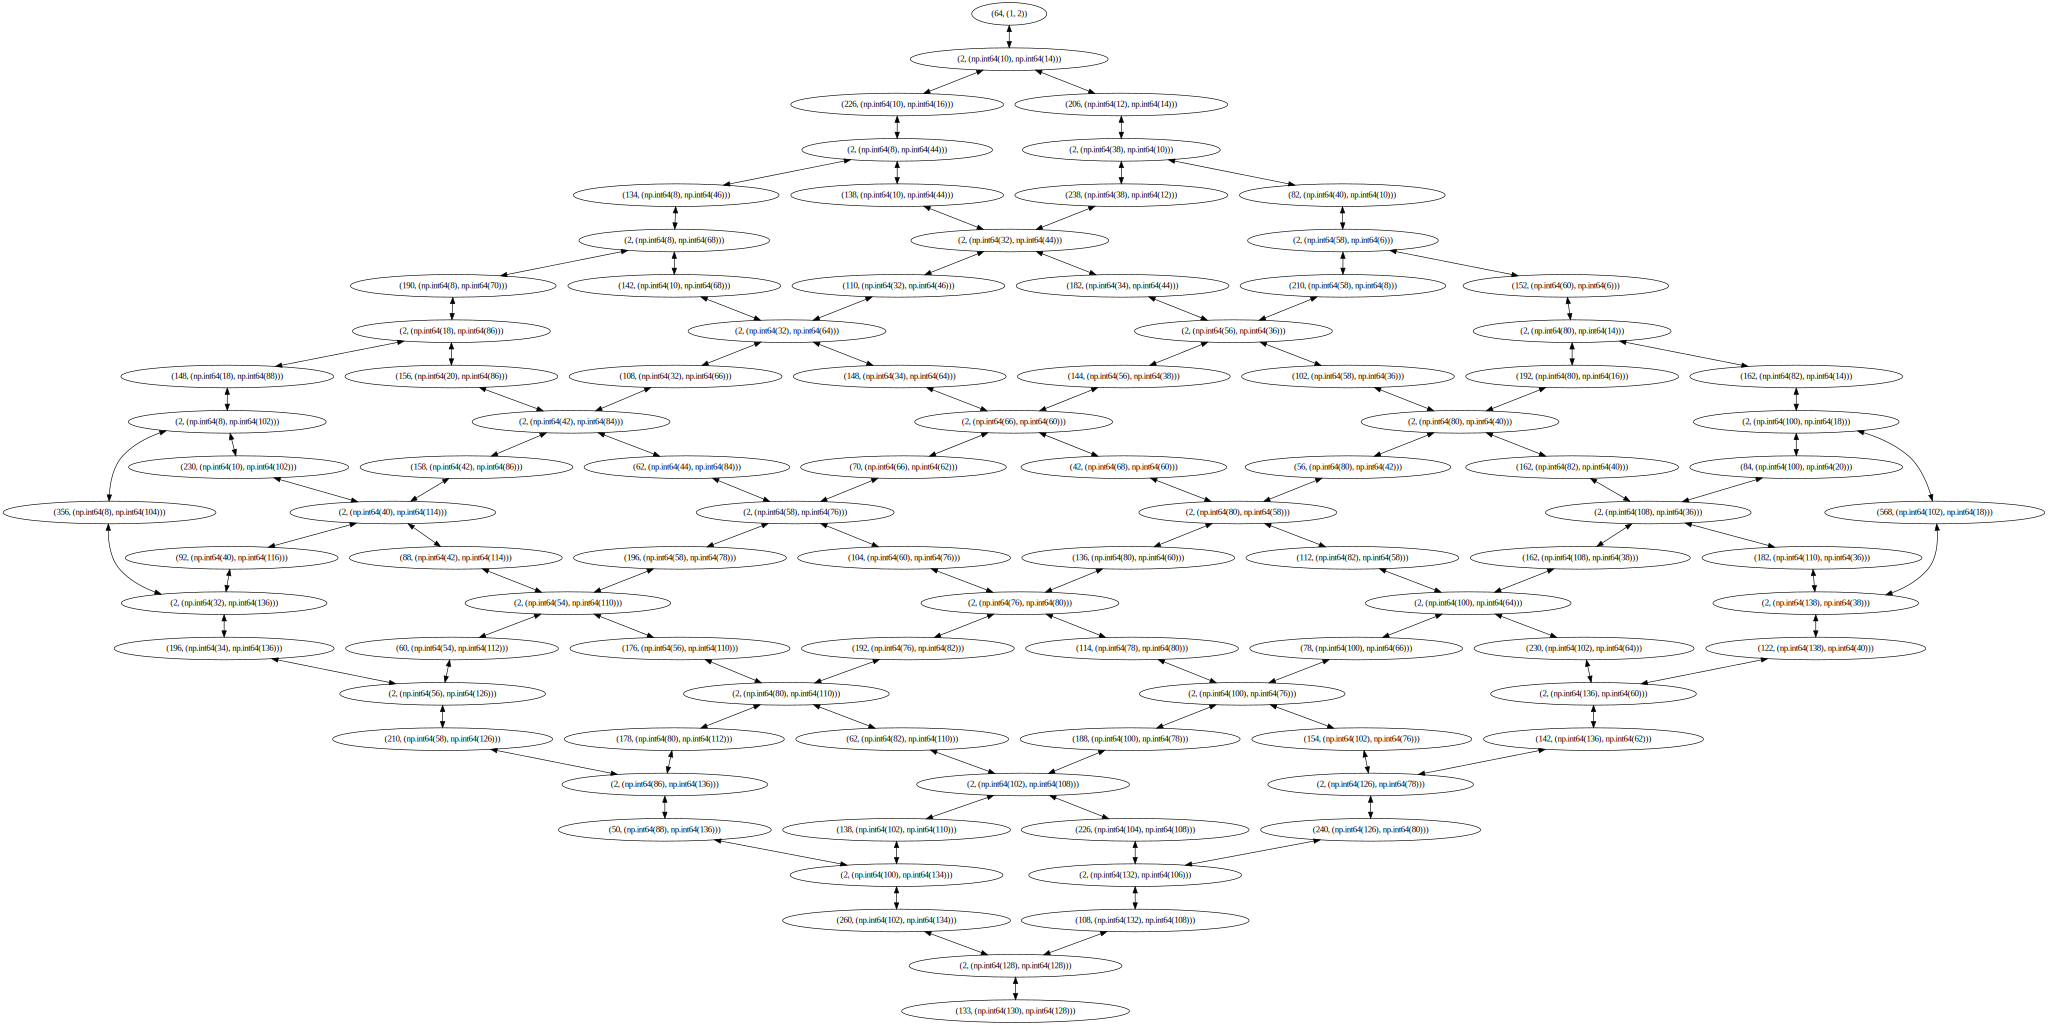

In [17]:
flat = create_flat_simplified_tuple(flat)
couples = make_undirected_graph(flat, bidirectional=True)
couples_for_visu = make_undirected_graph(flat, bidirectional=False)


visu = construct_dot_graph_from_couples(couples_for_visu)
visu